# Analysis of flights in the US for 2008

### Investigation Overview
In this investigation I reviewed the flights which took place in 2008 to which airlines dominate the the US sky. Along the way understand if this was a funciton of efficiency or fleet of airlines and how frequently their flights were delayed.

## Dataset Overview
The dataset consisted of over 7mm records detailing individual flights by each plane in the airlines fleet, how long the plain was in the air, if the plan was delayed or on time. The dataset include individual flight plans for the 20 major US airlines and 30 attributes. To give more context to the initial dataset I also enriched the dataset with airline carrier and airport names

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("fivethirtyeight")

In [7]:
df = pd.read_csv(r'D:\\Reference\\Udacity\\Section5\\2008.csv')
df_airlines = pd.read_csv(r'D:\\Reference\\Udacity\\Section5\\carriers.csv')
df_airports = pd.read_csv(r'D:\\Reference\\Udacity\\Section5\\airports.csv')

In [8]:
df1 = pd.merge(df, df_airlines, left_on='UniqueCarrier', right_on= 'Code').drop('Code', axis=1)
df2 = pd.merge(df1, df_airports, left_on='Origin', right_on= 'iata').drop('iata', axis=1)
df2.rename(columns={'airport': 'orig_airport', 'city': 'orig_city', 'state':'orig_state',
                    'country':'orig_country', 'lat':'orig_lat', 'long':'orig_long'}, inplace=True)
df3 = pd.merge(df2, df_airports, left_on='Dest', right_on= 'iata').drop('iata', axis=1)
df3.rename(columns={'airport': 'dest_airport', 'city': 'dest_city', 'state':'dest_state', 'country':'dest_country',
                    'lat':'dest_lat', 'long':'dest_long'}, inplace=True)

In [9]:
df3['CarrierDelay'].fillna(value=0, inplace=True)
df3['WeatherDelay'].fillna(value=0, inplace=True)
df3['NASDelay'].fillna(value=0, inplace=True)
df3['SecurityDelay'].fillna(value=0, inplace=True)
df3['LateAircraftDelay'].fillna(value=0, inplace=True)
df3.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,orig_state,orig_country,orig_lat,orig_long,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,VA,USA,38.944532,-77.45581,Tampa International,Tampa,FL,USA,27.975472,-82.53325
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,VA,USA,38.944532,-77.45581,Tampa International,Tampa,FL,USA,27.975472,-82.53325


In [10]:
df3['CancellationCode'] = df['CancellationCode'].map({'A': 'Carrier', 'B': 'Weather', 'C': 'NationalAirSystem', 'D': 'Security', 0: 'NotCancelled'})
df3['CancellationCode'].fillna(value= 'NotCancelled', inplace= True)

In [11]:
df3['arrival_delay'] = df3['CRSDepTime'] - df3['DepTime']
df3['dept_delay'] = df['CRSArrTime'] - df3['ArrTime']

df3['flight_pattern'] = df3['Origin'].map(str) + '-' + df3['Dest']

### Who are the players in the US passenger airline industry?
Typically when we think of major airlines in the US airline industry the major global carries such as United Airline, Delta Airlines and American airlines come to mind. However, when we look at the the percentage of flights made in 2008 Southwest Airlines clearly commands the sky with approximately 17% of the flights made in the US, almost double their nearest competitor in American Airlines which made a little over 8% of the flights.

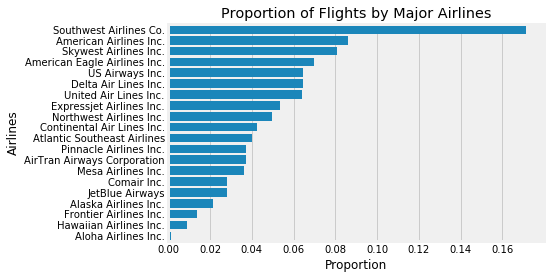

In [12]:
airline_counts = df3['Airlines'].value_counts()
airline_order = airline_counts.index

#compute proportion
flights = len(df3['Year'])
max_airline_count = airline_counts[0]
max_prop = max_airline_count / flights

# establish tick locations and create a plot
base_color= sns.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sns.countplot(data= df3, y='Airlines', color= base_color, order= airline_order)
plt.xticks(tick_props * flights, tick_names)
plt.xlabel('Proportion')
plt.title("Proportion of Flights by Major Airlines");

### How did Soutwest Airlines do this?
Despite having approximately 100 less planes, the budget airline was able to do this by making frequent short distance flights. Comparing the flight distance to American Airlines, the flight path of Southwest Airlines is approximately 200 miles shorter.

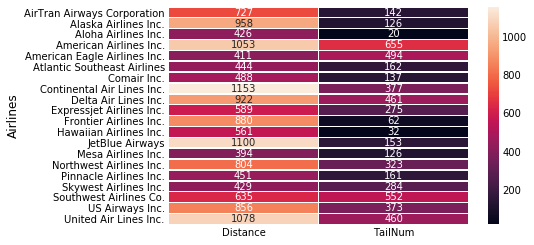

In [13]:
flights = df3.pivot_table(index='Airlines', aggfunc={'TailNum':'nunique', 'Distance':'mean'})

ax = sns.heatmap(flights, annot=True,  linewidths=.5,fmt='.0f');

### Which Airports does Southwest Airlines Service?
True to its name, Southwest typically services smaller airport in the southwestern United States. On the next slide are the top 10 most frequent flight patterns made by Southwest in 2008.

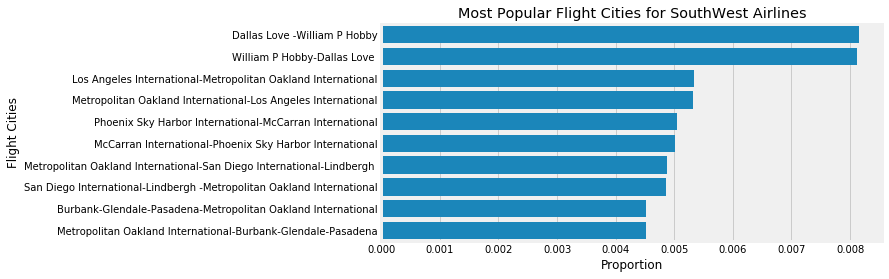

In [14]:
df3['flight_pattern'] = df3['Origin'].map(str) + '-' + df3['Dest']
df3['flight_pattern_city'] = df3['orig_airport'].map(str) + '-' + df3['dest_airport']


#create dataframe to isolate south West
southwest = df3.query('Airlines == "Southwest Airlines Co."')
plt.figure(figsize=[8,4])

sw_flight_city_counts = southwest['flight_pattern_city'].value_counts().nlargest(10)
sw_flight_city_order = sw_flight_city_counts.index

#compute proportion
sw_flight_city_flights = len(southwest['Year'])
sw_flight_city_max_airline_count = sw_flight_city_counts[0]
sw_flight_city_max_prop = sw_flight_city_max_airline_count / sw_flight_city_flights

# establish tick locations and create a plot
base_color= sns.color_palette()[0]
sw_flight_city_tick_props = np.arange(0, sw_flight_city_max_prop, 0.001)
sw_flight_city_tick_names = ['{:0.3f}'.format(v) for v in sw_flight_city_tick_props]

sns.countplot(data= southwest, y='flight_pattern_city', color= base_color, order= sw_flight_city_order)
plt.xticks(sw_flight_city_tick_props* sw_flight_city_flights, sw_flight_city_tick_names)
plt.ylabel('Flight Cities')
plt.xlabel('Proportion')
plt.title('Most Popular Flight Cities for SouthWest Airlines');

### How does Southwest's on time record look compared to rest of the US airline industry?
Over 800K of the flights made by Soutwest were departed with in 5mins of their scheduled departure time...

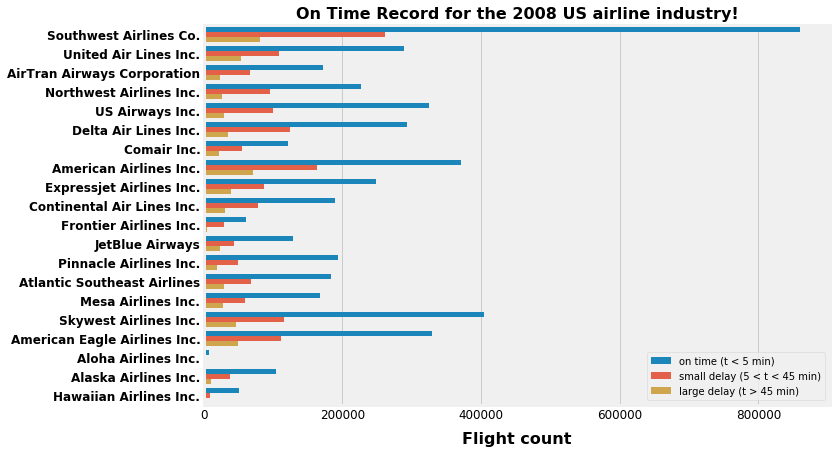

In [18]:
# https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial/notebook

#-------------------------------------------------------------------------------
# Function that defines hwo delays are grouped
delay_type = lambda x: ((0,1)[x>5],2)[x>45]
df3['delay_level'] = df3['ArrDelay'].apply(delay_type)
#-------------------------------------------------------------------------------
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='Airlines', hue= 'delay_level', data= df3)
#-------------------------------------------------------------------------------

# We replace the a
abbr_companies = df_airlines.set_index('Code')['Airlines'].to_dict()

#labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
#ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
plt.title('On Time Record for the 2008 US airline industry!', fontsize=16, weight = 'bold')
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()